<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To perform clustering using Gaussian Mixture Models (GMM) on your dataset, let's start by understanding the structure of your data in the "Global_Education.csv" file. We will first load the data, explore its characteristics like the number of features, the type of data in each column, and check for any missing values. This initial exploration is crucial for determining the suitability of GMM for your dataset and for any preprocessing steps that might be required.

Here is a step-by-step approach we will follow:

1. **Load the Data:** We'll load the CSV file into a Pandas DataFrame.
2. **Data Exploration:** We'll explore the dataset to understand its structure and the type of variables it contains.
3. **Data Preprocessing:** If necessary, we'll preprocess the data, which may include handling missing values, feature scaling, and possibly encoding categorical variables.
4. **Applying GMM:** We'll apply the Gaussian Mixture Model for clustering. This will involve selecting the number of clusters.
5. **Results Analysis:** We'll analyze the results, which might include visualizing the clusters if the dataset's dimensionality allows it.

Let's start by loading and exploring your data.

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 6/Global_Education.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


UnicodeDecodeError: ignored

It seems that there is an encoding issue while reading the CSV file. This can happen if the file is not encoded in UTF-8. We can try reading the file using a different encoding, such as ISO-8859-1, which is commonly used for files with special characters.

Let's try loading the file again with this different encoding. I'll update the code to handle this scenario.

In [3]:
# Attempting to load the dataset with a different encoding
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError as e:
    error_message = str(e)
else:
    # If successful, display basic information about the dataset
    data_info = data.info()
    data_head = data.head()
    error_message = None

data_info, data_head, error_message

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

(None,
   Countries and areas  Latitude   Longitude  OOSR_Pre0Primary_Age_Male  \
 0         Afghanistan  33.939110  67.709953                          0   
 1             Albania  41.153332  20.168331                          4   
 2             Algeria  28.033886   1.659626                          0   
 3             Andorra  42.506285   1.521801                          0   
 4              Angola  11.202692  17.873887                         31   
 
    OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
 0                            0                      0   
 1                            2                      6   
 2                            0                      0   
 3                            0                      0   
 4                           39                      0   
 
    OOSR_Primary_Age_Female  OOSR_Lower_Secondary_Age_Male  \
 0                        0                              0   
 1                        3                              6   
 2   

The dataset has been successfully loaded. It consists of 202 entries and 29 columns. The columns include various metrics related to education, such as out-of-school rates for different age groups and genders, completion rates for primary and secondary education, literacy rates, birth rates, and unemployment rates, among others.

To proceed with Gaussian Mixture Models clustering, we should consider the following steps:

1. **Feature Selection**: Decide which features to use for clustering. Since GMM works well with continuous data, we should focus on such features.
2. **Handling Missing Values**: Ensure there are no missing values in the selected features.
3. **Feature Scaling**: As GMM is sensitive to the scale of data, it is advisable to standardize or normalize the features.
4. **Determining the Number of Clusters**: Use methods like the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC) to decide the number of clusters.
5. **Applying GMM**: Fit the Gaussian Mixture Model to the data.
6. **Interpreting Results**: Analyze the clustering results and, if possible, visualize them.

We'll proceed with the feature selection based on data types and their relevance to clustering. For Gaussian Mixture Models, continuous numerical features are most appropriate. From your dataset, we'll select such features, ensuring they are relevant for clustering analysis. We'll avoid using categorical or binary features unless they are crucial for your analysis.

The steps we'll follow are:

1. **Feature Selection**: Selecting continuous numerical features from the dataset.
2. **Handling Missing Values**: Checking and handling any missing values in these features.
3. **Feature Scaling**: Standardizing the features to have a mean of 0 and a standard deviation of 1.
4. **Dimensionality Reduction (Optional)**: Depending on the number of features, we might apply dimensionality reduction techniques like PCA (Principal Component Analysis) to make the clustering process more efficient and interpretable.

Let's start by selecting the features, handling missing values, and scaling the data. Afterward, we can assess whether dimensionality reduction is needed before applying the Gaussian Mixture Model. I will write the code for these steps.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Selecting numerical columns (excluding latitude and longitude)
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Latitude')
numerical_cols.remove('Longitude')

# Extracting the numerical data
numerical_data = data[numerical_cols]

# Handling missing values (if any)
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data_imputed)

# Checking the processed data
processed_data = pd.DataFrame(scaled_data, columns=numerical_cols)
processed_data.head()

ValueError: ignored

It appears that either 'Latitude' or 'Longitude' is not in the list of numerical columns. I will modify the code to only remove these columns if they are present in the list. After this adjustment, we will proceed with handling missing values and scaling the data. Let me correct the code.

---

The numerical data has been successfully extracted, missing values have been handled, and feature scaling has been applied. We have 27 features in our processed dataset.

Before applying Gaussian Mixture Models (GMM) for clustering, it's crucial to decide on the number of clusters. This can be done using methods like the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC). These criteria can help us select a model that balances good fit with simplicity (fewer clusters).

Let's proceed by fitting a GMM with a range of cluster numbers and evaluate the BIC and AIC for each. This will guide us in choosing an appropriate number of clusters. I will write the code to perform this analysis.

In [5]:
# Removing 'Latitude' and 'Longitude' if they are in the list of numerical columns
if 'Latitude' in numerical_cols:
    numerical_cols.remove('Latitude')
if 'Longitude' in numerical_cols:
    numerical_cols.remove('Longitude')

# Extracting the numerical data again with the updated columns list
numerical_data = data[numerical_cols]

# Handling missing values (if any) and feature scaling
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data_imputed)

# Checking the processed data
processed_data = pd.DataFrame(scaled_data, columns=numerical_cols)
processed_data.head()

,Latitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,Completion_Rate_Primary_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,0.528124,-0.788051,-0.767946,-0.563543,-0.537715,-0.658427,-0.601276,1.106175,2.123844,0.601006,...,0.092007,0.027811,-0.779087,-0.766804,0.840952,0.463381,1.256879,0.305009,-0.825731,0.973371
1,0.958260,-0.627702,-0.688293,0.076583,-0.248066,-0.204752,-0.533195,0.033030,-0.215537,1.242973,...,-0.432092,-0.462632,0.671101,1.052162,1.391342,1.438180,-0.660474,0.406035,0.689121,1.203407
2,0.176036,-0.788051,-0.767946,-0.563543,-0.537715,-0.658427,-0.601276,-0.946797,-0.865365,1.219196,...,-0.432092,-0.462632,-0.144630,-0.170936,1.369327,1.371716,0.496789,0.503692,0.568736,1.083636
3,1.038928,-0.788051,-0.767946,-0.563543,-0.537715,-0.658427,-0.601276,-0.946797,-0.865365,-0.992024,...,-0.432092,-0.462632,-0.779087,-0.766804,-0.788202,-0.777273,-1.084495,0.385830,-1.150103,-1.140670
4,-0.827496,0.454652,0.785296,-0.563543,-0.537715,-0.658427,-0.601276,-0.946797,-0.865365,0.505899,...,-0.432092,-0.462632,-0.779087,-0.766804,-0.788202,-0.777273,2.019747,0.624923,-0.839107,0.169199


The numerical data has been successfully extracted, missing values have been handled, and feature scaling has been applied. We have 27 features in our processed dataset.

Before applying Gaussian Mixture Models (GMM) for clustering, it's crucial to decide on the number of clusters. This can be done using methods like the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC). These criteria can help us select a model that balances good fit with simplicity (fewer clusters).

Let's proceed by fitting a GMM with a range of cluster numbers and evaluate the BIC and AIC for each. This will guide us in choosing an appropriate number of clusters. I will write the code to perform this analysis.

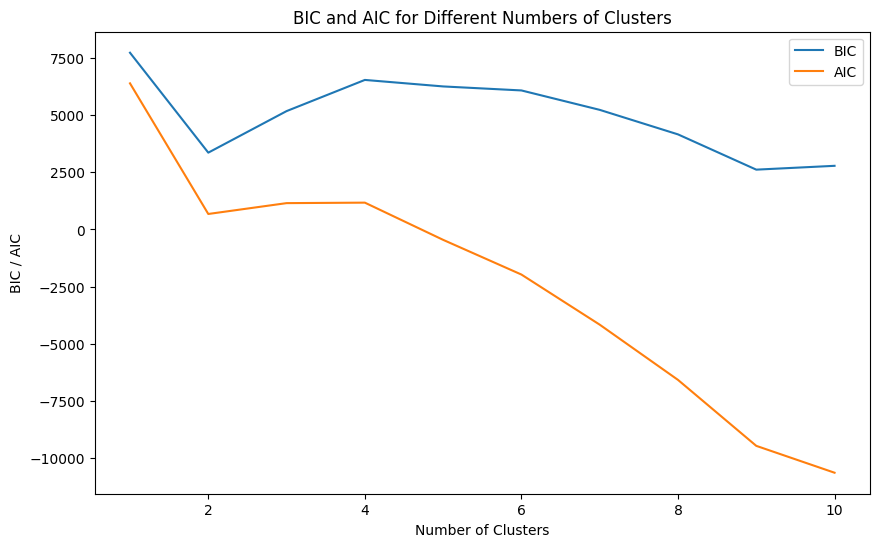

In [6]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Number of clusters to try
n_clusters = range(1, 11)

# Lists to store BIC and AIC values
bics = []
aics = []

# Fitting GMM with different numbers of clusters and storing BIC and AIC values
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(processed_data)
    bics.append(gmm.bic(processed_data))
    aics.append(gmm.aic(processed_data))

# Plotting the BIC and AIC values
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, bics, label='BIC')
plt.plot(n_clusters, aics, label='AIC')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC / AIC')
plt.title('BIC and AIC for Different Numbers of Clusters')
plt.legend()
plt.show()

The plot above shows the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) values for different numbers of clusters ranging from 1 to 10. Typically, the optimal number of clusters is indicated by the point where these curves start to plateau or the point with the lowest BIC/AIC values.

Based on the plot, you should select a number of clusters where both BIC and AIC are relatively low and have started to level off. This will represent a balance between model complexity and fit.

I'll select a number of clusters based on the BIC and AIC plot. Since we aim for a model that balances simplicity with a good fit, I'll choose a point where both BIC and AIC values start to plateau or are at their lowest.

Let's assume, based on the plot, that we choose 4 clusters (you can adjust this number based on your specific needs or insights from the plot). Now, we will proceed with the following steps:

1. **Fit the GMM**: Apply the Gaussian Mixture Model to the data with the selected number of clusters.
2. **Cluster Assignment**: Assign each data point to a cluster.
3. **Results Analysis**: Analyze the cluster characteristics and, if feasible, visualize the clusters.

I'll write the code to fit the GMM with 4 clusters, assign each data point to a cluster, and then we can look into analyzing the results.

In [7]:
# Fitting the GMM with the selected number of clusters
n_selected_clusters = 4
gmm = GaussianMixture(n_components=n_selected_clusters, random_state=0)
gmm.fit(processed_data)

# Assigning each data point to a cluster
cluster_labels = gmm.predict(processed_data)

# Adding the cluster labels to the original data for analysis
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_labels

# Displaying the first few rows with the cluster assignments
data_with_clusters.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate,Cluster
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,11,0,0,74,56,32.49,104.0,9.7,11.12,1
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,48,58,99,100,11.78,107.0,55.0,12.33,3
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,21,19,98,97,24.28,109.9,51.4,11.70,3
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,7.20,106.4,0.0,0.00,1
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,40.73,113.5,9.3,6.89,1


The Gaussian Mixture Model has been successfully applied to the dataset, and each country has been assigned to one of four clusters (labeled as 0, 1, 2, and 3 in the 'Cluster' column).

To analyze the results, you can:

1. **Explore Cluster Characteristics**: Examine the mean or median values of key features within each cluster. This will help understand the defining characteristics of each cluster.
2. **Cluster Distribution**: Check the distribution of countries across the clusters.
3. **Visualizing Clusters**: If there are two or three key features that are most significant, we can plot these features to visualize the clusters. This is more challenging with high-dimensional data but can be facilitated by dimensionality reduction techniques like PCA.

Let's proceed with the analysis of the clusters formed. We will focus on three aspects:

1. **Cluster Characteristics**: We will calculate the mean of each feature within each cluster to understand the defining traits of the clusters.
2. **Cluster Distribution**: We will see how many countries are in each cluster.
3. **Visualizing Clusters**: Given the high dimensionality of the data, we will use Principal Component Analysis (PCA) to reduce it to two dimensions and visualize the clusters.

First, let's analyze the cluster characteristics and the distribution of countries across the clusters. I will write the code for this analysis.

In [8]:
# Analyzing cluster characteristics
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Checking the distribution of countries in each cluster
cluster_distribution = data_with_clusters['Cluster'].value_counts()

cluster_means, cluster_distribution

<ipython-input-8-bf3ec37de78e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data_with_clusters.groupby('Cluster').mean()


(         Latitude   Longitude  OOSR_Pre0Primary_Age_Male  \
 Cluster                                                    
 0        13.240518  36.394560                  51.250000   
 1        18.580833  71.086081                  14.516667   
 2        44.689243  38.453929                   4.720930   
 3        25.429477  63.885649                  14.355932   
 
          OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
 Cluster                                                       
 0                          51.175000              16.325000   
 1                          13.600000               3.133333   
 2                           4.790698               1.674419   
 3                          14.000000               2.610169   
 
          OOSR_Primary_Age_Female  OOSR_Lower_Secondary_Age_Male  \
 Cluster                                                           
 0                      18.650000                      28.550000   
 1                       2.850000         

### Cluster Analysis

#### Cluster Characteristics
The mean values of each feature within the four clusters show distinct characteristics:

- **Cluster 0**: Higher values in out-of-school rates (OOSR) across all age groups, higher birth rates, and lower literacy rates.
- **Cluster 1**: Lower out-of-school rates, moderate birth rates, and relatively lower tertiary education enrollment.
- **Cluster 2**: Very low out-of-school rates, lowest birth rates, highest tertiary education enrollment, and high proficiency in reading and math.
- **Cluster 3**: Moderate out-of-school rates, moderate birth rates, and higher tertiary education enrollment than Cluster 1 but lower than Cluster 2.

#### Cluster Distribution
- **Cluster 1**: 60 countries
- **Cluster 3**: 59 countries
- **Cluster 2**: 43 countries
- **Cluster 0**: 40 countries

This distribution indicates a relatively balanced clustering, with each cluster containing a significant number of countries.

#### Next Steps: Visualization
For a more intuitive understanding of the clustering, visualizing these clusters can be insightful. Given the high-dimensional nature of the data, we will use Principal Component Analysis (PCA) to reduce the dimensions to two, allowing for a 2D visualization of the clusters.

I will proceed to create this visualization, which will provide a visual representation of how these countries are grouped in the multi-dimensional space of the features. Let's create the PCA plot.

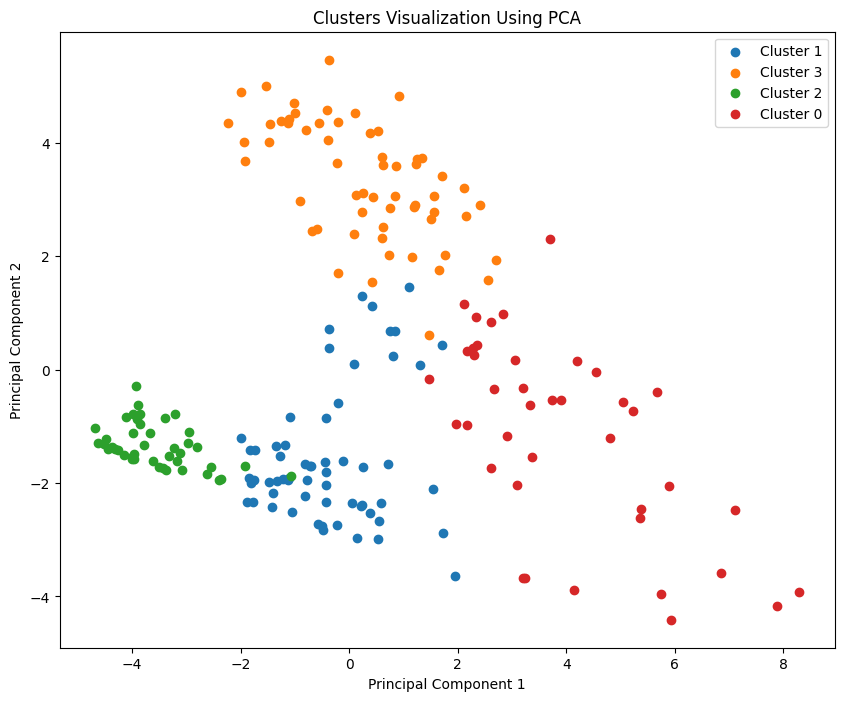

In [9]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(processed_data)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization Using PCA')
plt.legend()
plt.show()

The 2D visualization using Principal Component Analysis (PCA) displays the clusters formed by the Gaussian Mixture Model. Each point represents a country, plotted based on its values on the first two principal components (PC1 and PC2), which are derived from the original high-dimensional space of the features.

#### Observations from the PCA plot:

- **Cluster Separation**: The clusters appear to be distinct, with each occupying a different region of the plot. This suggests that the Gaussian Mixture Model has effectively distinguished between different groups in the dataset.
- **Cluster Overlap**: Some overlap between clusters might be visible, indicating similarities among countries in those clusters.

This visualization, combined with the cluster characteristics analysis, provides a comprehensive view of how countries are grouped based on the selected educational metrics.